In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [3]:
sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
images = context.catalog.load("express_expense")

[05/17/23 20:14:49] INFO     Loading data from 'express_expense' (PartitionedDataSet)...        ]8;id=662098;file:///home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=577212;file:///home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [18]:
image = images['1170-receipt.jpg']()

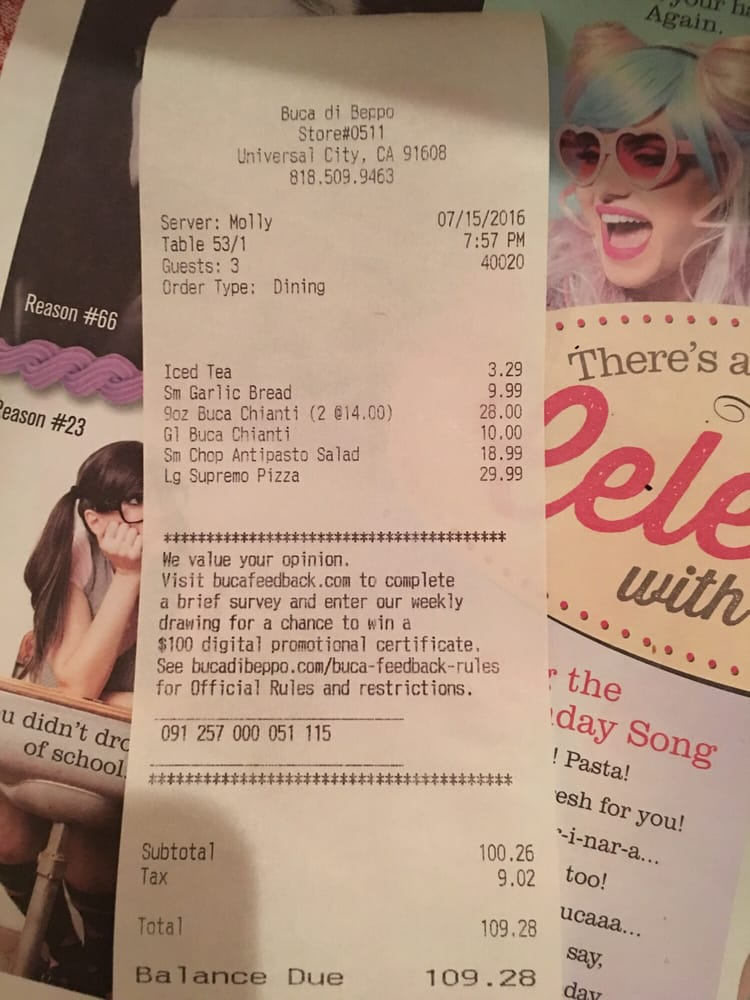

In [19]:
image

In [20]:
im = np.array(image)

In [21]:
im

array([[[ 89,  39,  28],
        [ 98,  48,  37],
        [106,  56,  45],
        ...,
        [ 92,  98,  72],
        [ 86,  92,  66],
        [ 84,  90,  64]],

       [[ 99,  49,  38],
        [104,  54,  43],
        [105,  55,  44],
        ...,
        [ 87,  93,  67],
        [ 82,  88,  62],
        [ 82,  88,  62]],

       [[103,  53,  42],
        [108,  58,  47],
        [112,  62,  51],
        ...,
        [ 84,  89,  66],
        [ 81,  87,  61],
        [ 83,  89,  63]],

       ...,

       [[154, 129,  99],
        [154, 129,  99],
        [154, 129,  99],
        ...,
        [142, 114,  93],
        [138, 111,  90],
        [135, 110,  88]],

       [[155, 128,  99],
        [155, 128,  99],
        [155, 128,  99],
        ...,
        [139, 112,  91],
        [134, 109,  87],
        [130, 108,  85]],

       [[155, 128,  99],
        [155, 128,  99],
        [155, 128,  99],
        ...,
        [139, 114,  92],
        [134, 109,  87],
        [130, 108,  85]]

In [24]:
masks = mask_generator.generate(im)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 masks = mask_generator.generate(im)                                                          │
│   2                                                                                              │
│                                                                                                  │
│ /home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/python3.10/site-packages/torch/utils/_cont │
│ extlib.py:115 in decorate_context                                                                │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ /home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/python3.10/site-packages/segment_anything/ │
│ automatic_mask_generator.py:163 in generate                                                      │
│                                                                                                  │
│   160 │   │   """                                                                                │
│   161 │   │                                                                                      │
│   162 │   │   # Generate masks                                                                   │
│ ❱ 163 │   │   mask_data = self._generate_masks(image)                                            │
│   164 │   │                                                                                      │
│   165 │   │   # Filter small disconnected regions and holes in masks                             │
│   166 │   │   if self.min_mask_region_area > 0:                                                  │
│                                                                                                  │
│ /home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/python3.10/site-packages/segment_anything/ │
│ automatic_mask_generator.py:206 in _generate_masks                                               │
│                                                                                                  │
│   203 │   │   # Iterate over image crops                                                         │
│   204 │   │   data = MaskData()                                                                  │
│   205 │   │   for crop_box, layer_idx in zip(crop_boxes, layer_idxs):                            │
│ ❱ 206 │   │   │   crop_data = self._process_crop(image, crop_box, layer_idx, orig_size)          │
│   207 │   │   │   data.cat(crop_data)                                                            │
│   208 │   │                                                                                      │
│   209 │   │   # Remove duplicate masks between crops                                             │
│                                                                                                  │
│ /home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/pytho